<a href="https://colab.research.google.com/github/itsjustdinesh/A-Statistical-Analysis-of-Cycling-Performance-Across-Rider-and-Stage-Classifications-/blob/main/A_Statistical_Analysis_of_Cycling_Performance_Across_Rider_and_Stage_Classifications_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 1: Load & inspect DataP.txt

In [6]:
import pandas as pd


# adjust filename/path if needed

In [7]:
fn = 'DataP.txt'
df = pd.read_csv(fn, sep=r'\s*,\s*', engine='python', quotechar='"', encoding='utf-8')

# quick cleaning

In [8]:
df.columns = df.columns.str.strip().str.replace('"','')
for c in df.columns:
    if df[c].dtype == object:
        df[c] = df[c].str.strip().str.replace('"','')

In [9]:
# show results
print("=== SHAPE ===")
print(df.shape)
print("\n=== COLUMNS ===")
print(df.columns.tolist())
print("\n=== FIRST 8 ROWS ===")
print(df.head(8).to_string(index=False))
print("\n=== MISSING VALUES ===")
print(df.isna().sum())
print("\n=== UNIQUE VALUES (categorical cols) ===")
for c in ['rider_class','stage_class']:
    if c in df.columns:
        print(f"\n{c} ->", df[c].unique(), " (counts -> )")
        print(df[c].value_counts())

=== SHAPE ===
(3496, 1)

=== COLUMNS ===
['all_riders rider_class stage points stage_class']

=== FIRST 8 ROWS ===
all_riders rider_class stage points stage_class
           Tadej Pogačar All Rounder X1 15 flat
         Tadej Pogačar All Rounder X2 219 hills
           Tadej Pogačar All Rounder X3 34 flat
         Tadej Pogačar All Rounder X4 264 hills
         Tadej Pogačar All Rounder X6 114 hills
         Tadej Pogačar All Rounder X7 274 hills
           Tadej Pogačar All Rounder X8 50 flat
           Tadej Pogačar All Rounder X9 50 flat

=== MISSING VALUES ===
all_riders rider_class stage points stage_class    0
dtype: int64

=== UNIQUE VALUES (categorical cols) ===


In [11]:
import pandas as pd

# Try reading using any whitespace as separator
df = pd.read_csv("DataP.txt", sep=r"\s+", engine="python", header=0, encoding="utf-8")

print("=== SHAPE ===")
print(df.shape)
print("\n=== COLUMNS ===")
print(df.columns.tolist())
print("\n=== FIRST 8 ROWS ===")
print(df.head(8).to_string(index=False))
print("\n=== MISSING VALUES ===")
print(df.isna().sum())
print("\n=== UNIQUE VALUES (rider_class) ===")
print(df['rider_class'].unique())
print("\n=== UNIQUE VALUES (stage_class) ===")
print(df['stage_class'].unique())


ParserError: Expected 7 fields in line 230, saw 8. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

In [12]:
import pandas as pd
import io

# Read file in universal mode
with open("DataP.txt", "r", encoding="utf-8", errors="ignore") as f:
    raw = f.read()

# Replace tabs with commas and collapse multiple spaces to a single comma
import re
cleaned = re.sub(r'[\t ]+', ',', raw)

# Now parse again
df = pd.read_csv(io.StringIO(cleaned), quotechar='"')

print("=== SHAPE ===")
print(df.shape)
print("\n=== COLUMNS ===")
print(df.columns.tolist())
print("\n=== FIRST 8 ROWS ===")
print(df.head(8).to_string(index=False))
print("\n=== MISSING VALUES ===")
print(df.isna().sum())


=== SHAPE ===
(3496, 5)

=== COLUMNS ===
['all_riders', 'rider_class', 'stage', 'points', 'stage_class']

=== FIRST 8 ROWS ===
   all_riders rider_class stage  points stage_class
Tadej,Pogačar All,Rounder    X1      15        flat
Tadej,Pogačar All,Rounder    X2     219       hills
Tadej,Pogačar All,Rounder    X3      34        flat
Tadej,Pogačar All,Rounder    X4     264       hills
Tadej,Pogačar All,Rounder    X6     114       hills
Tadej,Pogačar All,Rounder    X7     274       hills
Tadej,Pogačar All,Rounder    X8      50        flat
Tadej,Pogačar All,Rounder    X9      50        flat

=== MISSING VALUES ===
all_riders     0
rider_class    0
stage          0
points         0
stage_class    0
dtype: int64


# STEP 2: Clean categorical commas, convert types, descriptive stats, and save plots

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# assume df is already loaded in the session from previous steps
# If not, re-run the previous read step to recreate df.


In [14]:
# 1) Clean stray commas inside textual fields (replace internal commas with a space)
for c in ['all_riders','rider_class']:
    if c in df.columns:
        df[c] = df[c].str.replace(',', ' ', regex=False).str.strip()

In [15]:
# 2) Ensure 'points' is numeric
df['points'] = pd.to_numeric(df['points'], errors='coerce')

In [16]:
# 3) Quick checks
print("Unique rider_class:", df['rider_class'].unique())
print("Counts by rider_class:\n", df['rider_class'].value_counts())
print("\nUnique stage_class:", df['stage_class'].unique())
print("Counts by stage_class:\n", df['stage_class'].value_counts())

Unique rider_class: ['All Rounder' 'Sprinter' 'Climber' 'Unclassed']
Counts by rider_class:
 rider_class
Unclassed      2185
Sprinter        551
Climber         437
All Rounder     323
Name: count, dtype: int64

Unique stage_class: ['flat' 'hills' 'mount']
Counts by stage_class:
 stage_class
hills    1472
flat     1104
mount     920
Name: count, dtype: int64


In [17]:
# 4) Descriptive tables
group_by_rider = df.groupby('rider_class')['points'].agg(['count','mean','median','std','min','max']).round(3)
group_by_stage = df.groupby('stage_class')['points'].agg(['count','mean','median','std','min','max']).round(3)


In [18]:
print("\n=== Summary by rider_class ===")
print(group_by_rider.to_string())
print("\n=== Summary by stage_class ===")
print(group_by_stage.to_string())


=== Summary by rider_class ===
             count    mean  median     std  min  max
rider_class                                         
All Rounder    323  37.687    12.0  63.962    0  304
Climber        437  20.169     6.0  43.447    0  269
Sprinter       551  15.036     0.0  41.832    0  272
Unclassed     2185   6.420     0.0  23.283    0  260

=== Summary by stage_class ===
             count    mean  median     std  min  max
stage_class                                         
flat          1104  11.794     0.0  33.219    0  272
hills         1472  12.520     0.0  36.130    0  274
mount          920  12.878     0.0  39.907    0  304


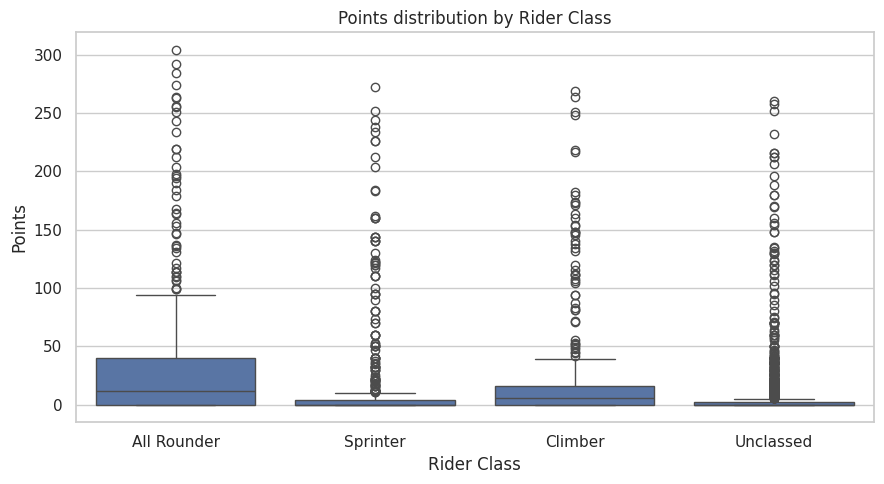

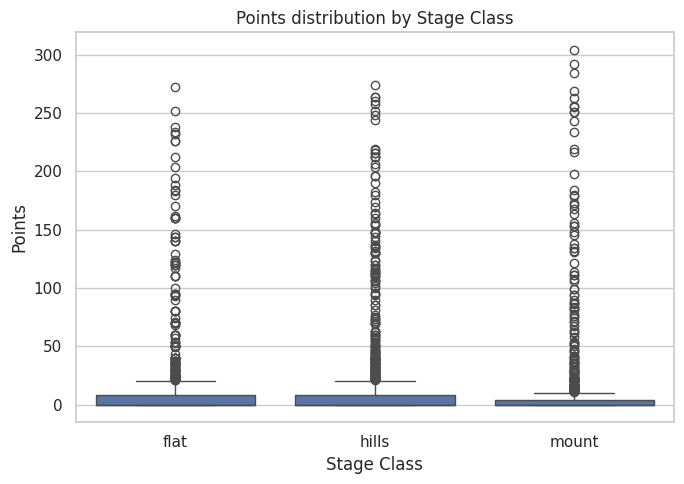

In [19]:
# 5) Save plots (boxplots + interaction)
sns.set(style="whitegrid")

plt.figure(figsize=(9,5))
sns.boxplot(data=df, x='rider_class', y='points')
plt.title('Points distribution by Rider Class')
plt.xlabel('Rider Class')
plt.ylabel('Points')
plt.tight_layout()
plt.savefig('boxplot_rider_class.png', dpi=300)
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='stage_class', y='points')
plt.title('Points distribution by Stage Class')
plt.xlabel('Stage Class')
plt.ylabel('Points')
plt.tight_layout()
plt.savefig('boxplot_stage_class.png', dpi=300)
plt.show()

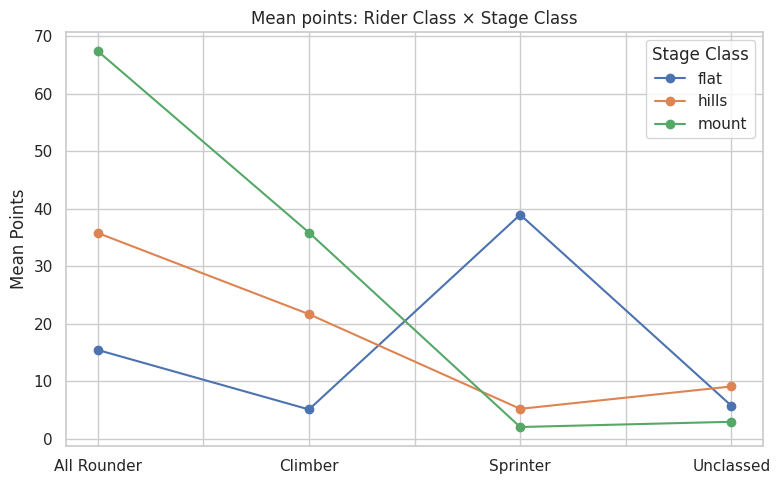

In [20]:
# Interaction: mean points per rider_class across stage_class
pivot = df.groupby(['rider_class','stage_class'])['points'].mean().unstack()
pivot.plot(marker='o', figsize=(8,5))
plt.title('Mean points: Rider Class × Stage Class')
plt.ylabel('Mean Points')
plt.xlabel('')
plt.legend(title='Stage Class')
plt.tight_layout()
plt.savefig('interaction_mean_points.png', dpi=300)
plt.show()

In [21]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('points ~ C(rider_class)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Check assumptions
shapiro_p = stats.shapiro(model.resid)[1]
levene_p = stats.levene(*[g["points"] for _, g in df.groupby("rider_class")])[1]
print("Shapiro–Wilk p =", shapiro_p)
print("Levene p =", levene_p)


                      sum_sq      df          F        PR(>F)
C(rider_class)  3.148937e+05     3.0  85.505214  2.198409e-53
Residual        4.286712e+06  3492.0        NaN           NaN
Shapiro–Wilk p = 5.538517417420275e-72
Levene p = 6.488152701124001e-52


In [22]:
groups = [g["points"].values for _, g in df.groupby("rider_class")]
kw_p = stats.kruskal(*groups)[1]
print("Kruskal–Wallis p =", kw_p)


Kruskal–Wallis p = 2.887179491172402e-71


In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['points'], groups=df['rider_class'], alpha=0.05)
print(tukey)


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1     group2  meandiff p-adj   lower    upper   reject
--------------------------------------------------------------
All Rounder   Climber  -17.518    0.0 -24.1259   -10.91   True
All Rounder  Sprinter  -22.651    0.0 -28.9618 -16.3402   True
All Rounder Unclassed -31.2676    0.0  -36.636 -25.8993   True
    Climber  Sprinter   -5.133 0.1012 -10.9016   0.6355  False
    Climber Unclassed -13.7497    0.0 -18.4687  -9.0306   True
   Sprinter Unclassed  -8.6166    0.0 -12.9096  -4.3236   True
--------------------------------------------------------------


In [24]:
!pip install scikit-posthocs
import scikit_posthocs as sp
sp.posthoc_dunn(df, val_col='points', group_col='rider_class', p_adjust='bonferroni')


,All Rounder,Climber,Sprinter,Unclassed
All Rounder,1.000000e+00,6.560854e-02,1.774560e-24,9.829659e-47
Climber,6.560854e-02,1.000000e+00,1.838582e-16,2.430592e-37
Sprinter,1.774560e-24,1.838582e-16,1.000000e+00,2.683631e-02
Unclassed,9.829659e-47,2.430592e-37,2.683631e-02,1.000000e+00


In [25]:
model2 = ols('points ~ C(rider_class) * C(stage_class)', data=df).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
print(anova_table2)


                                     sum_sq      df          F        PR(>F)
C(rider_class)                 3.148937e+05     3.0  92.816103  8.703760e-58
C(stage_class)                 6.359253e+02     2.0   0.281162  7.549231e-01
C(rider_class):C(stage_class)  3.460646e+05     6.0  51.001926  2.041749e-60
Residual                       3.940012e+06  3484.0        NaN           NaN


In [26]:
import pandas as pd, numpy as np, re
raw = open("DataP.txt", "r", encoding="utf-8", errors="ignore").read()
cleaned = re.sub(r'[\t ]+', ',', raw)
df = pd.read_csv(pd.io.common.StringIO(cleaned), quotechar='"')
df.columns = df.columns.str.strip().str.replace('"','')
df['points'] = pd.to_numeric(df['points'], errors='coerce')
for c in ['all_riders','rider_class']:
    df[c] = df[c].str.replace(',', ' ').str.strip()


In [27]:
import pandas as pd, numpy as np, re
raw = open("DataP.txt", "r", encoding="utf-8", errors="ignore").read()
cleaned = re.sub(r'[\t ]+', ',', raw)
df = pd.read_csv(pd.io.common.StringIO(cleaned), quotechar='"')
df.columns = df.columns.str.strip().str.replace('"','')
df['points'] = pd.to_numeric(df['points'], errors='coerce')
for c in ['all_riders','rider_class']:
    df[c] = df[c].str.replace(',', ' ').str.strip()


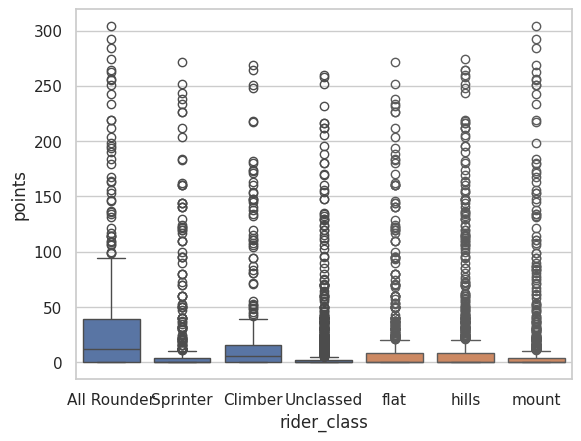

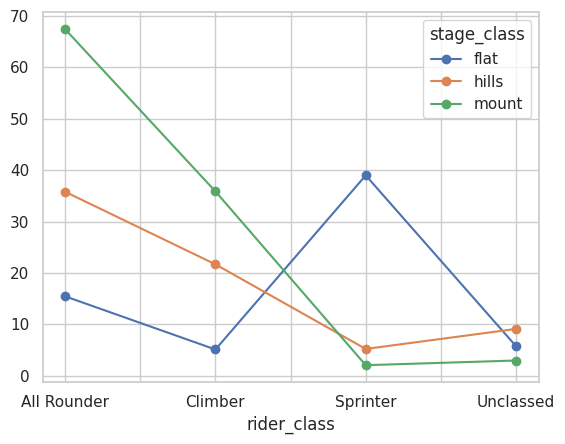

In [28]:
import matplotlib.pyplot as plt, seaborn as sns
group_by_rider = df.groupby('rider_class')['points'].agg(['count','mean','median','std','min','max'])
group_by_stage = df.groupby('stage_class')['points'].agg(['count','mean','median','std','min','max'])
sns.boxplot(data=df, x='rider_class', y='points')
plt.savefig('boxplot_rider_class.png', dpi=300)
sns.boxplot(data=df, x='stage_class', y='points')
plt.savefig('boxplot_stage_class.png', dpi=300)
pivot = df.groupby(['rider_class','stage_class'])['points'].mean().unstack()
pivot.plot(marker='o')
plt.savefig('interaction_mean_points.png', dpi=300)


In [29]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('points ~ C(rider_class)', data=df).fit()
sm.stats.anova_lm(model, typ=2)
stats.shapiro(model.resid)       # Normality
stats.levene(*[g["points"] for _, g in df.groupby("rider_class")])  # Variance test
stats.kruskal(*[g["points"].values for _, g in df.groupby("rider_class")])  # Non-parametric test


KruskalResult(statistic=np.float64(330.20067056583673), pvalue=np.float64(2.887179491172402e-71))

In [30]:
# Tukey (if ANOVA valid)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
pairwise_tukeyhsd(endog=df['points'], groups=df['rider_class'], alpha=0.05)

# Dunn (if Kruskal-Wallis used)
!pip install scikit-posthocs
import scikit_posthocs as sp
sp.posthoc_dunn(df, val_col='points', group_col='rider_class', p_adjust='bonferroni')


,All Rounder,Climber,Sprinter,Unclassed
All Rounder,1.000000e+00,6.560854e-02,1.774560e-24,9.829659e-47
Climber,6.560854e-02,1.000000e+00,1.838582e-16,2.430592e-37
Sprinter,1.774560e-24,1.838582e-16,1.000000e+00,2.683631e-02
Unclassed,9.829659e-47,2.430592e-37,2.683631e-02,1.000000e+00


In [31]:
model2 = ols('points ~ C(rider_class) * C(stage_class)', data=df).fit()
sm.stats.anova_lm(model2, typ=2)


,sum_sq,df,F,PR(>F)
C(rider_class),3.148937e+05,3.0,92.816103,8.703760e-58
C(stage_class),6.359253e+02,2.0,0.281162,7.549231e-01
C(rider_class):C(stage_class),3.460646e+05,6.0,51.001926,2.041749e-60
Residual,3.940012e+06,3484.0,NaN,NaN
